# Autocorrelation

The second [youtuber](https://www.youtube.com/@egorhowell/videos) did a very good job of explaining stability. What does he say about [autocorrelation](https://www.youtube.com/watch?v=GcJ__g_cimA)?

We're using the same air passengers data set.

In [1]:
import pandas as pd

df = pd.read_csv('files/AirPassengers.csv', index_col=0)
df.index = pd.to_datetime(df.index)

The video uses a different library, but pandas also has a function to plot an autocorrelation plot.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

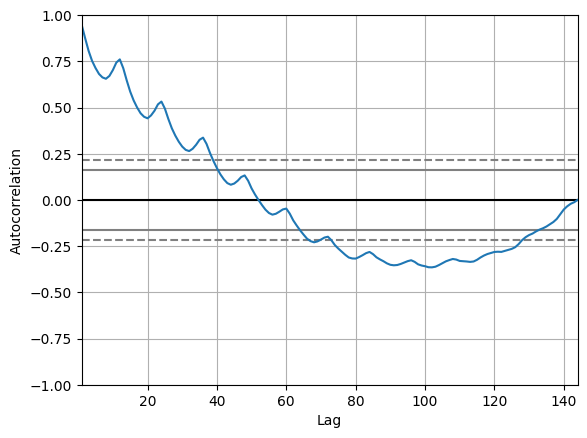

In [2]:
pd.plotting.autocorrelation_plot(df['#Passengers'])

But what are we looking at? Well, let's zoom in to the first 24 'lags'.

(0.0, 24.0)

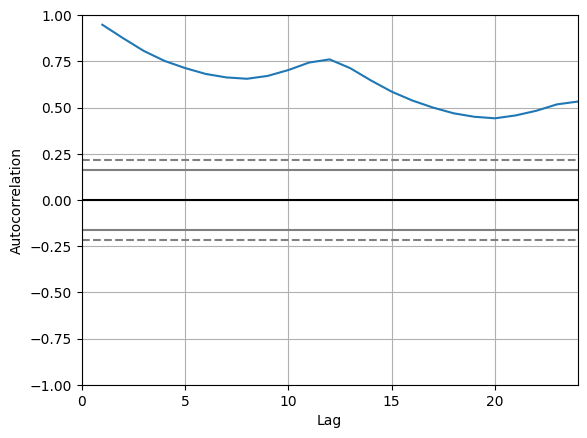

In [3]:
pd.plotting.autocorrelation_plot(df['#Passengers']).set_xlim([0, 24])

The "lag" is the number of datapoints you go back to see if there is a correlation. This means we can detect som key points (look at the actual data below to compare):

* Upper left corner, lag 1: every datapoint is correlated to itself. This means you have a perfect positive correlation of 1.
* Lag 6: We're going back 6 months. In this dataset that is a bad idea as you are comparing summer months (spikes) to winter months (valleys), and the data clearly shows how that those two are not related.
* Lag 12: Go back 1 year. This means we are correlating spikes with spikes and valleys with valleys. The correlation is therefore high.
* Lag 24: Same as before, but slightly less as we are now skipping a year.

<Axes: xlabel='Month'>

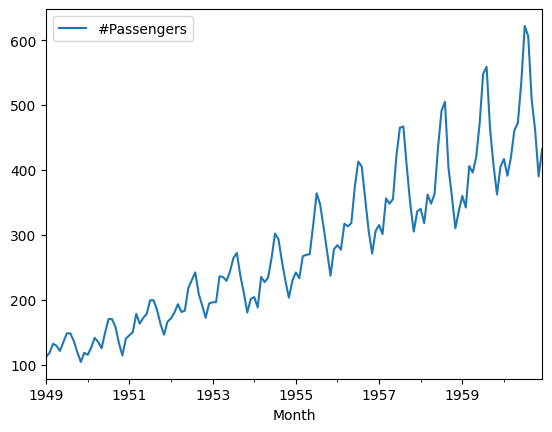

In [5]:
df.plot()

There is another [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.autocorr.html) in pandas to calculate autocorrelation.

In [4]:
for i in range(1, 25):
    corr = df["#Passengers"].autocorr(lag=i)
    print(f"Lag {i}: { corr }")

Lag 1: 0.9601946480498522
Lag 2: 0.8956753113926392
Lag 3: 0.837394765081794
Lag 4: 0.7977346989350624
Lag 5: 0.7859431491184304
Lag 6: 0.7839187959206183
Lag 7: 0.7845921291388301
Lag 8: 0.7922150472595746
Lag 9: 0.8278519011167602
Lag 10: 0.8827127951607842
Lag 11: 0.9497020331006317
Lag 12: 0.9905273692085446
Lag 13: 0.9481066160592017
Lag 14: 0.8754477915539791
Lag 15: 0.8114659384543108
Lag 16: 0.7694487920842656
Lag 17: 0.7558191230371455
Lag 18: 0.7487523142605247
Lag 19: 0.7455000168641182
Lag 20: 0.7517886585378154
Lag 21: 0.7945029068579574
Lag 22: 0.8590126910996432
Lag 23: 0.9367167085350967
Lag 24: 0.9832540581084245


We could graph this, but we'd be back at the plot we had before. Nice peaks at 12 and 24 though.